# Medical Cost Personal Datasets
# Insurance Forecast by using Linear Regression , Random-Forest 

# Content
### Columns

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

### Acknowledgements
The dataset is available on GitHub here.

### Inspiration
Can you accurately predict insurance costs?

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('insurance.csv')

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


### Data Visualization

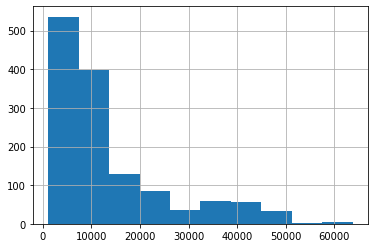

In [6]:
df['charges'].hist()

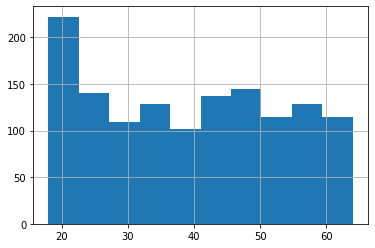

In [7]:
df['age'].hist()

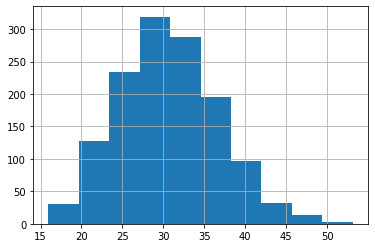

In [16]:
df['bmi'].hist()

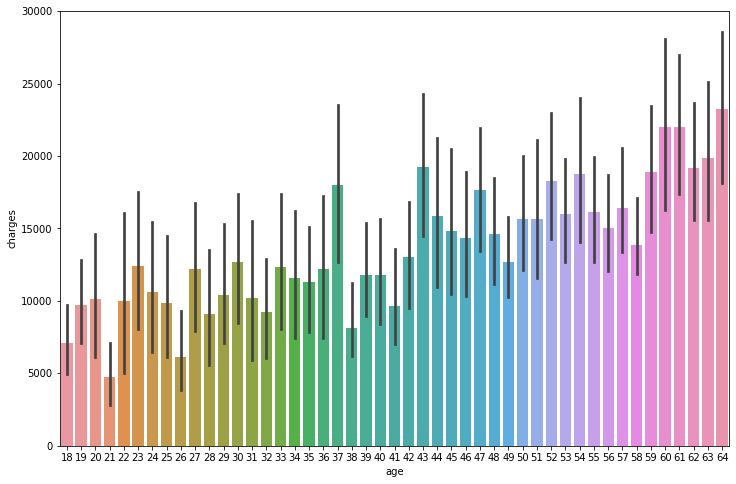

In [10]:
plt.figure(figsize=(12,8))

sns.barplot(y='charges',x='age',data=df)

According to the data as age is greater the people take high charges insurance

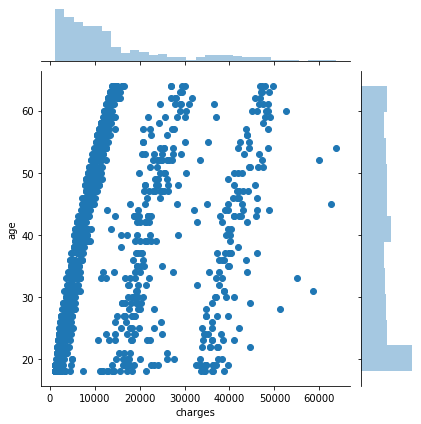

In [15]:
sns.jointplot(x='charges',y='age',data=df)

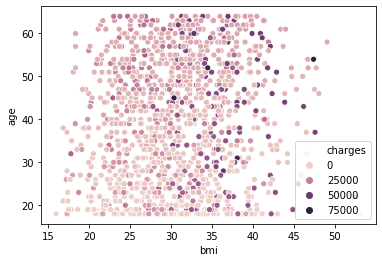

In [18]:
sns.scatterplot(x='bmi',y='age',data=df,hue=df['charges'])

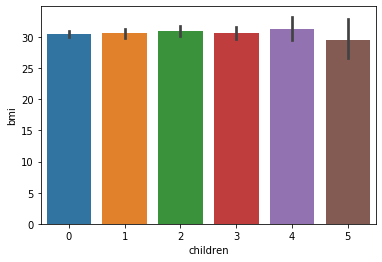

In [24]:
sns.barplot(df['children'],df['bmi'])

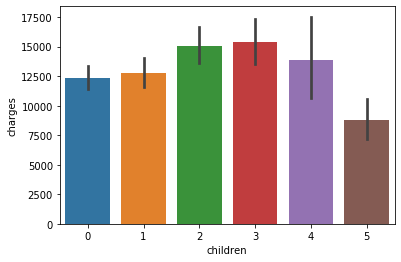

In [20]:
sns.barplot(df['children'],df['charges'])

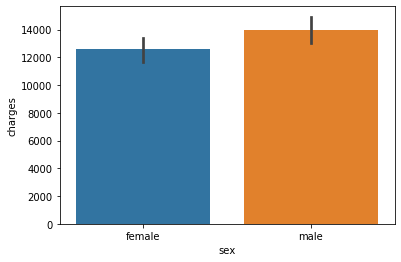

In [22]:
sns.barplot(df['sex'],df['charges'])

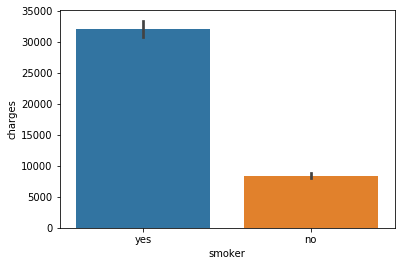

In [23]:
sns.barplot(df['smoker'],df['charges'])

According to the data there are lot of people who smoke and they taken the insurance

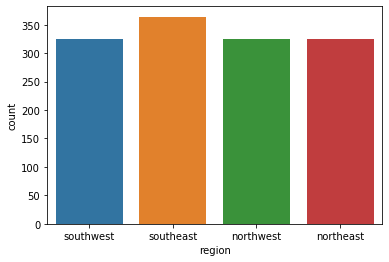

In [26]:
sns.countplot(df['region'])

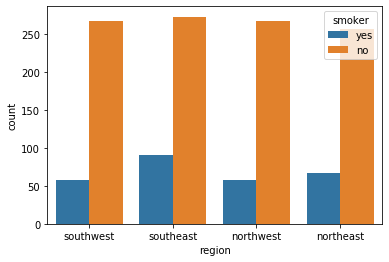

In [27]:
sns.countplot(df['region'],hue=df['smoker'])

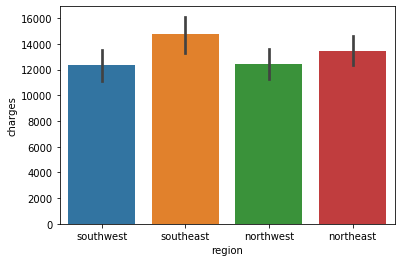

In [29]:
sns.barplot(df['region'],df['charges'])

there are lot of people from southeast taken insurance

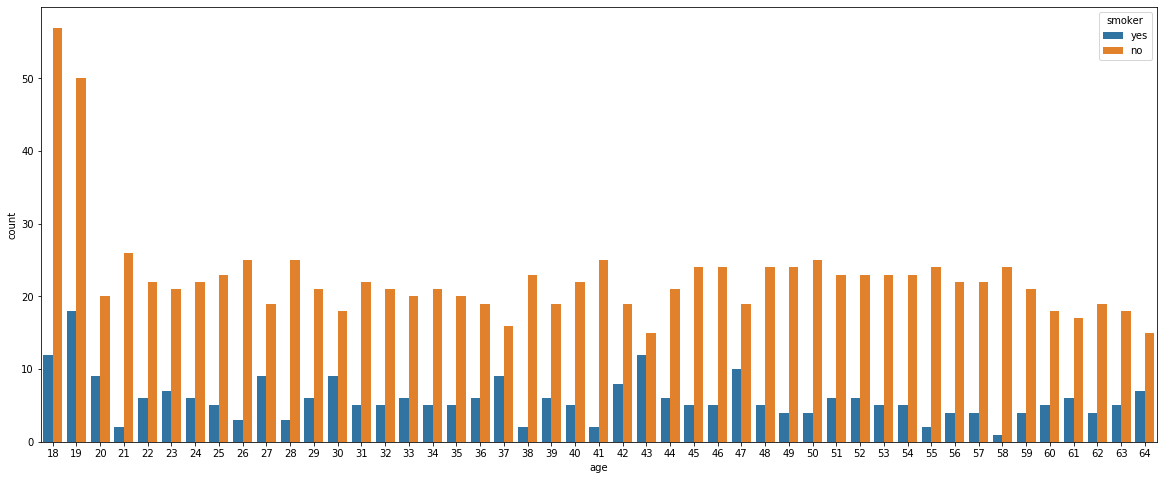

In [31]:
plt.figure(figsize=(20,8))
sns.countplot(df['age'],hue=df['smoker'])

from the data teenagers smoke highest rate 

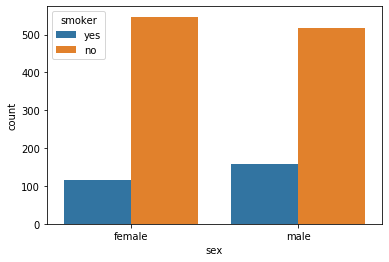

In [33]:
sns.countplot(df['sex'],hue=df['smoker'])

In [35]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### One Hot Encoding 

In [36]:
cat = [feat for feat in df.columns if df[feat].dtype == 'O']
cat

['sex', 'smoker', 'region']

In [38]:
dummies = pd.get_dummies(df[cat],drop_first=True)

In [39]:
df.drop(cat,axis=1,inplace=True)

In [41]:
df = pd.concat([df,dummies],axis=1)

In [42]:
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


### Train Test Split

In [60]:
X = df.drop('charges',axis=1)
y = df['charges']

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Feature Scaling 

In [62]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scale_X_train = scaler.fit_transform(X_train)
scale_X_test = scaler.transform(X_test)

## Linear-Regression 

In [47]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(scale_X_train,y_train)
predict = lr.predict(scale_X_test)

In [49]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

print(f'MAE -> {mean_absolute_error(y_test,predict)}')
print()
print(f'MSE -> {mean_squared_error(y_test,predict)}')
print()
print(f'RMSE -> {np.sqrt(mean_squared_error(y_test,predict))}')
print()
print(f'Accuracy -> {r2_score(y_test,predict)}')

MAE -> 4193.463021932157

MSE -> 35090225.72562568

RMSE -> 5923.700340633857

Accuracy -> 0.7605492639270064


## Ridge Regression

In [51]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(scale_X_train,y_train)
rid_predict = ridge.predict(scale_X_test)


print(f'MAE -> {mean_absolute_error(y_test,rid_predict)}')
print()
print(f'MSE -> {mean_squared_error(y_test,rid_predict)}')
print()
print(f'RMSE -> {np.sqrt(mean_squared_error(y_test,rid_predict))}')
print()
print(f'Accuracy -> {r2_score(y_test,rid_predict)}')

MAE -> 4194.962847609944

MSE -> 35091766.23017514

RMSE -> 5923.830368112775

Accuracy -> 0.7605387517418989


## Random Forest 

In [52]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(scale_X_train,y_train)
rf_predict = rf.predict(scale_X_test)

print(f'MAE -> {mean_absolute_error(y_test,rf_predict)}')
print()
print(f'MSE -> {mean_squared_error(y_test,rf_predict)}')
print()
print(f'RMSE -> {np.sqrt(mean_squared_error(y_test,rf_predict))}')
print()
print(f'Accuracy -> {r2_score(y_test,rf_predict)}')

MAE -> 2701.8455407993215

MSE -> 22677470.433652997

RMSE -> 4762.0867730075015

Accuracy -> 0.845252149984141


# Therefore Random Forest Perform Good ....!